In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE, r2_score as R2
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
df = pd.read_csv('Kevin_final.csv')

In [3]:
#df['fl_date'] = df['fl_date'].astype('datetime64')

In [5]:
numericlist = []
for i in  df:
    if df[i].dtypes != 'object':
        numericlist.append(i)
numericlist = numericlist[:-1]
numericlist

['day',
 'unique_carrier_rank',
 'tail_num_rank',
 'origin_rank',
 'dest_rank',
 'distance',
 'crs_arr_time',
 'crs_elapsed_time',
 'sdomt_gallons',
 'tdomt_gallons',
 'ts_cost',
 'tdomt_cost']

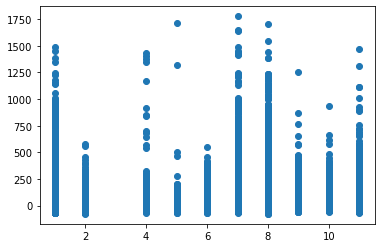

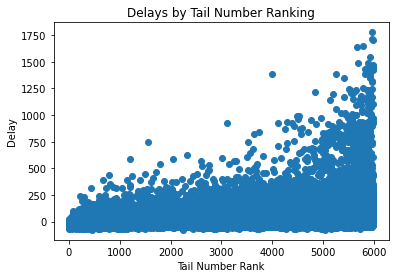

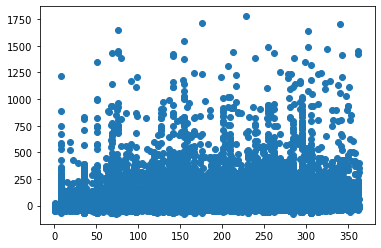

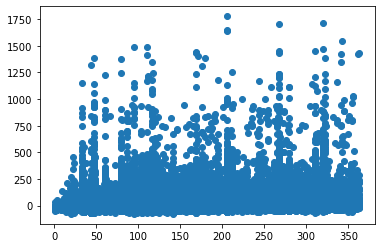

In [29]:
plt.scatter(df['unique_carrier_rank'], df['arr_delay'])
plt.show()
plt.scatter(df['tail_num_rank'], df['arr_delay'])
plt.title('Delays by Tail Number Ranking')
plt.xlabel('Tail Number Rank')
plt.ylabel('Delay')
plt.show()
plt.scatter(df['origin_rank'], df['arr_delay'])
plt.show()
plt.scatter(df['dest_rank'], df['arr_delay'])
plt.show()

In [30]:
X = df[['day',
 'unique_carrier_rank',
 'tail_num_rank',
 'origin_rank',
 'dest_rank',
 'distance',
 'crs_arr_time',
 'crs_elapsed_time',
 'tdomt_cost']]
y = df['arr_delay']
Xtrain, Xtest, ytrain, ytest = tts(X,y, train_size = 0.85, test_size = 0.15,random_state = 5)

In [31]:
scale = StandardScaler()
Xtrain = scale.fit_transform(Xtrain)

In [32]:
linreg = LinearRegression(fit_intercept = True,copy_X = True, n_jobs = -100, positive = False )

In [33]:
linreg.fit(Xtrain,ytrain)


LinearRegression(n_jobs=-100)

In [34]:
Xtest = scale.transform(Xtest)

In [35]:
ypred = linreg.predict(Xtrain)
MAE(ytrain,ypred), R2(ytrain,ypred)

(25.01338963589182, 0.06766491401127517)

In [36]:
ypred = linreg.predict(Xtest)
MAE(ytest,ypred), R2(ytest,ypred)

(25.127756423767853, 0.06603121274674184)

In [54]:
grid = {'fit_intercept': [True,False],'copy_X':[True,False], 'n_jobs': [-100, 0, 100], 'positive': [True,False]}

In [55]:
linregcheck = GridSearchCV(estimator = linreg, param_grid = grid)
linregcheck.fit(Xtrain,ytrain)

GridSearchCV(estimator=LinearRegression(n_jobs=-100),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-100, 0, 100], 'positive': [True, False]})

In [56]:
#for i in grid.keys():
print(linregcheck.best_estimator_)

LinearRegression(n_jobs=-100)


Feature: 0, Score: -1.30328
Feature: 1, Score: -2.15238
Feature: 2, Score: 11.43162
Feature: 3, Score: 3.74446
Feature: 4, Score: 3.27276
Feature: 5, Score: 5.57372
Feature: 6, Score: 2.77948
Feature: 7, Score: -6.35556
Feature: 8, Score: -1.03316


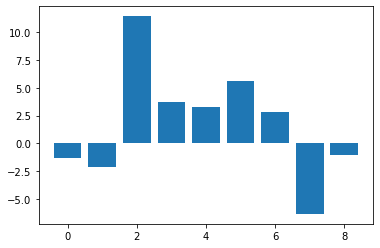

In [37]:
importance = linreg.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
X = df[['day',
 'unique_carrier_rank',
 'tail_num_rank',
 'origin_rank',
 'dest_rank',
 'distance',
 'crs_arr_time',
 'crs_elapsed_time',
 'sdomt_gallons',
 'tdomt_gallons',
 'ts_cost',
 'tdomt_cost']]
y = df['arr_delay']
Xtrain, Xtest, ytrain, ytest = tts(X,y, train_size = 0.85, test_size = 0.15,random_state = 5)

In [49]:
scale = StandardScaler()
Xtrain = scale.fit_transform(Xtrain)

In [50]:
lasreg = Lasso(max_iter = 1000000, selection = 'random',tol = 0.01 )

In [51]:
lasreg.fit(Xtrain,ytrain)

Lasso(max_iter=1000000, selection='random', tol=0.01)

In [52]:
Xtest = scale.transform(Xtest)

In [53]:
ypred = lasreg.predict(Xtrain)
MAE(ytrain,ypred), R2(ytrain,ypred)

(24.900185723946873, 0.06410363211378711)

In [54]:
ypred = lasreg.predict(Xtest)
MAE(ytest,ypred), R2(ytest,ypred)

(25.002932549624084, 0.06201166559636251)

In [46]:
grid = {'alpha': [1.0, 10.0, 100.0],'fit_intercept': [True,False],'max_iter': [100000], 'tol': [0.15, 0.12, 0.1, 0.01, 0.001], 'positive': [True,False], 'selection':['cyclic', 'random']}

In [47]:
lasregcheck = GridSearchCV(estimator = lasreg, param_grid = grid)
lasregcheck.fit(Xtrain,ytrain)

GridSearchCV(estimator=Lasso(max_iter=1000000, selection='random', tol=0.01),
             param_grid={'alpha': [1.0, 10.0, 100.0],
                         'fit_intercept': [True, False], 'max_iter': [100000],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.15, 0.12, 0.1, 0.01, 0.001]})

In [113]:
print(lasregcheck.best_estimator_)

Lasso(max_iter=100000, selection='random', tol=0.1)


Feature: 0, Score: -0.30571
Feature: 1, Score: -0.00000
Feature: 2, Score: 10.20009
Feature: 3, Score: 2.37086
Feature: 4, Score: 2.17460
Feature: 5, Score: -0.00000
Feature: 6, Score: 1.77467
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000


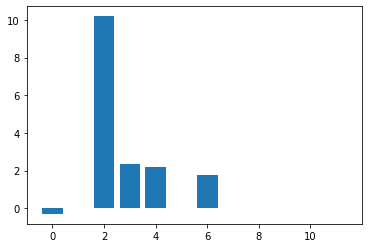

In [55]:
importance = lasreg.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [123]:
X['arr_delay'] = y

C:\Users\kv-ex\AppData\Local\Temp/ipykernel_13568/321956916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['arr_delay'] = y


In [125]:
X.to_csv(path_or_buf = 'Kevin_training.csv', index = False)

In [53]:
X = df[['day',
 'unique_carrier_rank',
 'tail_num_rank',
 'origin_rank',
 'dest_rank',
 'distance',
 'crs_arr_time',
 'crs_elapsed_time',
 'sdomt_gallons',
 'tdomt_gallons',
 'ts_cost',
 'tdomt_cost']]
y = df['arr_delay']
Xtrain, Xtest, ytrain, ytest = tts(X,y, train_size = 0.85, test_size = 0.15,random_state = 5)

In [54]:
scale = StandardScaler()
Xtrain = scale.fit_transform(Xtrain)

In [55]:
rigreg = Ridge()

In [56]:
rigreg.fit(Xtrain,ytrain)

Ridge()

In [43]:
Xtest = scale.transform(Xtest)

In [44]:
ypred = rigreg.predict(Xtrain)
MAE(ytrain,ypred), R2(ytrain,ypred)

(25.019153031201306, 0.06810551221570293)

In [45]:
ypred = rigreg.predict(Xtest)
MAE(ytest,ypred), R2(ytest,ypred)

(25.127700399419638, 0.06657740406358259)

In [13]:
grid = {'alpha': [1.0, 10.0, 100.0],'fit_intercept': [True,False],'max_iter': [None, 1000, 15000], 'tol': [0.001],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], 'positive': [True,False]}

In [ ]:
#rigregcheck = GridSearchCV(estimator = rigreg, param_grid = grid)
#rigregcheck.fit(Xtrain,ytrain)

In [1]:
print(rigregcheck.best_estimator_)

NameError: name 'rigregcheck' is not defined

Feature: 0, Score: -1.30831
Feature: 1, Score: -0.48055
Feature: 2, Score: 11.38572
Feature: 3, Score: 3.71837
Feature: 4, Score: 3.07480
Feature: 5, Score: 6.39315
Feature: 6, Score: 2.78181
Feature: 7, Score: -7.23734
Feature: 8, Score: 42.55285
Feature: 9, Score: -70.13177
Feature: 10, Score: 0.35553
Feature: 11, Score: 26.57258


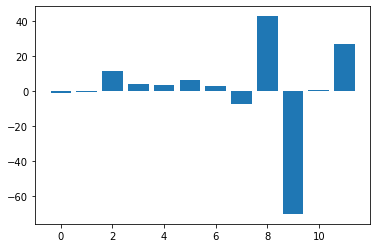

In [37]:
importance = rigreg.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [57]:
filename = 'final_ridge_regression_model.sav'
pickle.dump(rigreg,open(filename, 'wb'))


In [58]:
filename = 'scaler_model.sav'
pickle.dump(scale,open(filename, 'wb'))